# IMPORTANDO AS BIBLIOTECAS

In [1]:
import datetime
from os import path, listdir
from pathlib import Path
from inspect import stack

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# DEFININDO OPÇÕES GLOBAIS

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# FUNÇÕES ÚTEIS

In [39]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [path.join(path_dir, name) for name in listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

              # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
              if not isinstance(specific_type, (tuple, list)):
                  specific_type = [specific_type]

              print("FILTRANDO PARA AS EXTENSÕES: {}".format(specific_type))

              # FILTRANDO OS VALORES DA LISTA
              list_files = [arq for arq in list_files if (Path(arq).suffix in (specific_type) or str(Path(arq).suffix).replace(".", "") in (specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

# VARIÁVEIS GLOBAIS

In [40]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/DATASETS_GHCN_DAILY'

# FORMATO DESEJADO
specific_type = "csv"

In [47]:
# DADOS DE ESTAÇÕES CLIMÁTICAS
dir_stations = 'data/DATA_STATIONS/data_station.csv'

In [42]:
# NOME DA COLUNA QUE CONTÉM AS INFORMAÇÕES DAS ESTAÇÕES CLIMÁTICAS
name_column_location = "name"

# OBTENDO OS DADOS DO GHCN-DAILY

> Global Historical Climatology Network - Daily, Version 4
(NOAA GHCN v4)

In [43]:
# INICIANDO O DATAFRAME
df = pd.DataFrame()

# PERCORRENDO TODOS OS ARQUIVOS QUE ESTÃO NO DIRETÓRIO
for file in get_files_directory(data_dir,
                                specific_type=specific_type):

  print("REALIZANDO A LEITURA - {}".format(file))

  if path.isfile(file):

    # REALIZANDO A LEITURA DO DATAFRAME AUXILIAR
    df_aux = pd.read_csv(file, sep=",")

    # ADICIONANDO O RESULTAOD DA LEITURA AO DATAFRAME GLOBAL
    df = pd.concat([df, df_aux], ignore_index=True, axis=0)

FILTRANDO PARA AS EXTENSÕES: ['csv']
REALIZANDO A LEITURA - data/DATASETS_GHCN_DAILY/data_brazil_daily.csv


In [30]:
df.head()

,state,name,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth
0,NaN,VAL DE CANS INTL,821930,1942,10,79.445161,72.151613,88.512903,45.156774,NaN
1,NaN,VAL DE CANS INTL,821930,1942,11,80.116667,72.373333,89.940000,23.331000,NaN
2,NaN,VAL DE CANS INTL,821930,1942,12,78.722581,72.529032,88.332258,67.735161,NaN
3,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,7,83.751613,76.283871,89.893548,6.450968,NaN
4,NaN,PARNAIBA PREFEITO DR JOAO SIL,822880,1943,5,83.505000,76.020000,88.870000,34.996500,NaN


In [44]:
df["name"].value_counts()

VAL DE CANS INTL                 896
VIRACOPOS                        848
CAMPO GRANDE                     837
PAMPULHA CARLOS DRUMMOND DE A    789
COMANDANTE GUSTAVO KRAEMER       728
                                ... 
JANAUBA                            1
PALMEIRO DOS INDIOS                1
COTRIGUACU *                       1
JAGUARUANA                         1
ITAPERUNA                          1
Name: name, Length: 652, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89389 entries, 0 to 89388
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           0 non-null      float64
 1   name            89389 non-null  object 
 2   station         89389 non-null  int64  
 3   year            89389 non-null  int64  
 4   month           89389 non-null  int64  
 5   avg_temp        89389 non-null  float64
 6   avg_min_temp    89389 non-null  float64
 7   avg_max_temp    89389 non-null  float64
 8   avg_prcp        89389 non-null  float64
 9   avg_snow_depth  29 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 6.8+ MB


In [46]:
df.describe()

,state,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth
count,0.0,89389.000000,89389.000000,89389.000000,89389.000000,89389.000000,89389.000000,89389.000000,29.000000
mean,NaN,839458.434147,2004.280281,6.524438,75.609339,80.932543,90.587577,10.400848,789.383485
std,NaN,17385.535498,17.355799,3.427039,7.065953,255.362069,140.804616,18.425949,223.428202
min,NaN,749024.000000,1942.000000,1.000000,26.000000,16.828571,34.700000,0.000000,387.922581
25%,NaN,825990.000000,1990.000000,4.000000,71.533333,63.020000,80.948387,0.000000,567.406667
50%,NaN,836110.000000,2012.000000,7.000000,77.051613,68.990323,85.934483,0.090769,900.183333
75%,NaN,839810.000000,2019.000000,9.000000,80.625806,73.445161,89.600000,13.349333,965.489655
max,NaN,869980.000000,2023.000000,12.000000,101.600000,9999.900000,9999.900000,99.990000,967.722581


# OBTENDO OS DADOS DE ESTAÇÕES METEOLÓGICAS

In [48]:
# INICIANDO O DATAFRAME
df_station = pd.read_csv(dir_stations, sep=",")

In [49]:
df_station.head()

,name,country,state,lat,lon,elev,begin_station,end_station
0,IGARAPE-ACU NORTH,BR,NaN,-1.067,-47.617,57.0,19450514,19450920
1,BOCAIUVA SOUTHEAST,BR,NaN,-17.200,-43.667,828.0,19470406,19470523
2,OIAPOQUE,BR,NaN,3.814,-51.863,20.5,20160704,20190701
3,BOA VISTA,BR,NaN,2.805,-60.647,95.5,20160704,20210120
4,TARTARUGALZINHO,BR,NaN,1.497,-50.917,22.5,20161021,20180405


In [50]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           941 non-null    object 
 1   country        941 non-null    object 
 2   state          0 non-null      float64
 3   lat            937 non-null    float64
 4   lon            937 non-null    float64
 5   elev           937 non-null    float64
 6   begin_station  941 non-null    int64  
 7   end_station    941 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 58.9+ KB


In [51]:
df_station.describe()

,state,lat,lon,elev,begin_station,end_station
count,0.0,937.000000,937.000000,937.000000,9.410000e+02,9.410000e+02
mean,NaN,-15.457863,-47.819308,378.277695,1.992879e+07,2.015986e+07
std,NaN,8.473399,7.393010,362.592961,2.914832e+05,1.403735e+05
min,NaN,-33.750000,-72.787000,-999.900000,1.931010e+07,1.931093e+07
25%,NaN,-22.333000,-52.233000,79.000000,1.974061e+07,2.020030e+07
50%,NaN,-15.900000,-47.617000,302.500000,2.010111e+07,2.021092e+07
75%,NaN,-8.283000,-42.317000,617.000000,2.016070e+07,2.021092e+07
max,NaN,3.867000,-29.317000,1811.500000,2.021082e+07,2.021092e+07


# PRÉPROCESSAMENTO

## OBTENDO A COLUNA DE ANO DA ESTAÇÃO METEOLÓGICA

In [ ]:
for column_name in ["begin_station", "end_station"]:

  print("APLICANDO A OBTENÇÃO DO ANO PARA A COLUNA: {}".format(column_name))

  df_station["{}_{}".format(column_name, "year")] = df_station[column_name].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").year)

APLICANDO A OBTENÇÃO DO ANO PARA A COLUNA: begin_station
APLICANDO A OBTENÇÃO DO ANO PARA A COLUNA: end_station


## ORDENANDO O DATASET PELA ORDEM DAS ESTAÇÕES DO ANO

In [ ]:
df_station = df_station.sort_values(by=["name", "begin_station", "end_station"], ascending=True)

## REALIZANDO O JOIN DOS DADOS

Como precisamos obter a localização meterológica com cruzamento por estação e ano, realizamos usar uma função

In [ ]:
def get_station_location(df, df_station,
                         column_lat="LAT",
                         column_long="LONG",
                         column_elev="ELEV"):

  print("INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES")

  # CRIANDO AS COLUNAS DESEJADAS
  for column in [column_lat, column_long, column_elev]:
    # VERIFICANDO SE A COLUNA JÁ EXISTE
    if column not in df.columns:
      # CASO NÃO EXISTA, CRIA COM VALORES VÁZIOS
      df[column] = ""

  # PERCORRENDO O DATAFRAME
  for idx, row in df.iterrows():

    # FILTANDO ESTAÇÃO METEOLÓGICA ATUAL
    station = row[name_column_location]

    # OBTENDO O ANOATUAL
    year = row["year"]

    try:
      df_filter = df_station[(df_station["name"] == station) & (df_station["begin_station_year"] >= year)]

      if not df_filter.empty:
        # OBTENDO LATITUDE, LONGITUDE E ELEVAÇÃO DA ESTAÇÃO METEOLÓGICA
        lat, lon, elev = df_station[(df_station["name"] == station) & ((df_station["begin_station_year"] >= year) | (df_station["end_station_year"] <= year))].iloc[0][["lat", "lon", "elev"]]

        # ATUALIZANDO OS VALORES NO DATAFRAME ORIGINAL
        df.at[idx, column_lat] = lat
        df.at[idx, column_long] = lon
        df.at[idx, column_elev] = elev
    except Exception as ex:
        print(ex)

  print("PROCESSO CONCLUIDO COM SUCESSO")

  return df

In [ ]:
df_join = get_station_location(df=df, df_station=df_station)

In [ ]:
df_join

,name,country,state,lat,lon,elev,begin_station,end_station,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth,LAT,LONG,ELEV
0,IGARAPE-ACU NORTH,BR,NaN,-1.067,-47.617,57.0,19450514.0,19450920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
1,BOCAIUVA SOUTHEAST,BR,NaN,-17.200,-43.667,828.0,19470406.0,19470523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
2,OIAPOQUE,BR,NaN,3.814,-51.863,20.5,20160704.0,20190701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
3,BOA VISTA,BR,NaN,2.805,-60.647,95.5,20160704.0,20210120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
4,TARTARUGALZINHO,BR,NaN,1.497,-50.917,22.5,20161021.0,20180405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90325,CALCANHAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825950.0,2023.0,5.0,83.800,73.400,86.000,0.0,NaN,,,
90326,PARNAIBA PREFEITO DR JOAO SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822880.0,2023.0,6.0,83.800,82.400,89.600,0.0,NaN,,,
90327,SAO GABRIEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869840.0,2023.0,7.0,76.425,73.375,78.325,0.0,NaN,,,
90328,MARILIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,820305.0,2023.0,5.0,68.700,66.200,69.800,0.0,NaN,,,


In [ ]:
df_station[df_station["name"] == "CALCANHAR"]

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year
572,CALCANHAR,BR,NaN,-5.167,-35.483,14.0,19810205,20210920,1981,2021
43,CALCANHAR,BR,NaN,-5.167,-35.483,18.5,20160704,20190113,2016,2019


In [ ]:
df

,name,country,state,lat,lon,elev,begin_station,end_station,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth,LAT,LONG,ELEV
0,IGARAPE-ACU NORTH,BR,NaN,-1.067,-47.617,57.0,19450514.0,19450920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
1,BOCAIUVA SOUTHEAST,BR,NaN,-17.200,-43.667,828.0,19470406.0,19470523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
2,OIAPOQUE,BR,NaN,3.814,-51.863,20.5,20160704.0,20190701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
3,BOA VISTA,BR,NaN,2.805,-60.647,95.5,20160704.0,20210120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
4,TARTARUGALZINHO,BR,NaN,1.497,-50.917,22.5,20161021.0,20180405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90325,CALCANHAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825950.0,2023.0,5.0,83.800,73.400,86.000,0.0,NaN,,,
90326,PARNAIBA PREFEITO DR JOAO SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822880.0,2023.0,6.0,83.800,82.400,89.600,0.0,NaN,,,
90327,SAO GABRIEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869840.0,2023.0,7.0,76.425,73.375,78.325,0.0,NaN,,,
90328,MARILIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,820305.0,2023.0,5.0,68.700,66.200,69.800,0.0,NaN,,,


In [ ]:
pd.merge(df, df_station, left_on=["name"], right_on=["name"], how="inner")

,name,country_x,state_x,lat_x,lon_x,elev_x,begin_station_x,end_station_x,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth,LAT,LONG,ELEV,country_y,state_y,lat_y,lon_y,elev_y,begin_station_y,end_station_y,begin_station_year,end_station_year
0,IGARAPE-ACU NORTH,BR,NaN,-1.067,-47.617,57.0,19450514.0,19450920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,BR,NaN,-1.067,-47.617,57.0,19450514,19450920,1945,1945
1,IGARAPE-ACU NORTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749399.0,1945.0,5.0,77.711111,71.461111,87.155556,55.550000,NaN,-1.067,-47.617,57.0,BR,NaN,-1.067,-47.617,57.0,19450514,19450920,1945,1945
2,IGARAPE-ACU NORTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749399.0,1945.0,6.0,77.736667,71.080000,87.690000,63.327000,NaN,-1.067,-47.617,57.0,BR,NaN,-1.067,-47.617,57.0,19450514,19450920,1945,1945
3,IGARAPE-ACU NORTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749399.0,1945.0,7.0,77.270968,69.812903,88.164516,61.284194,NaN,-1.067,-47.617,57.0,BR,NaN,-1.067,-47.617,57.0,19450514,19450920,1945,1945
4,IGARAPE-ACU NORTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749399.0,1945.0,8.0,77.716129,70.296774,88.451613,61.284194,NaN,-1.067,-47.617,57.0,BR,NaN,-1.067,-47.617,57.0,19450514,19450920,1945,1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127862,TRINDADE (ILHA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,836500.0,2022.0,12.0,80.200000,77.000000,84.200000,0.000000,NaN,,,,BR,NaN,-20.500,-29.317,5.0,19430401,20210920,1943,2021
127863,TRINDADE (ILHA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,836500.0,2023.0,1.0,79.250000,77.000000,82.400000,0.000000,NaN,,,,BR,NaN,-20.500,-29.317,5.0,19430401,20210920,1943,2021
127864,TRINDADE (ILHA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,836500.0,2023.0,6.0,76.100000,71.600000,78.800000,0.000000,NaN,,,,BR,NaN,-20.500,-29.317,5.0,19430401,20210920,1943,2021
127865,TRINDADE (ILHA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,836500.0,2023.0,2.0,82.800000,78.800000,84.200000,0.000000,NaN,,,,BR,NaN,-20.500,-29.317,5.0,19430401,20210920,1943,2021


## REMOVENDO COLUNAS NÃO DESEJADAS

In [ ]:
# REALIZANDO UMA CÓPIA DO DATAFRAME ORIGINAL
df_original = df.copy()

# ANÁLISE EXPLORATÓRIA

Para possuir a maior quantidade de entradas, o foco será na análise com frequência de dados por meses do ano. Portanto removeremos as colunas que contém as médias trimestrais.

In [ ]:
# QUANTIDADE DE ESTADOS DISTINTOS
count_state = df[name_column_location].nunique()
count_state

738

In [ ]:
dict_describe_state = {}

# DESCRIBE POR ESTADO

# PERCORRENDO CADA UM DOS ESTADOS
for state in df[name_column_location].squeeze().unique():

    # FILTRANDO DATAFRAME
    df_filter_state = df[(df[name_column_location] == state)]

    # OBTENDO A QUANTIDADE DE DADOS VÁLIDOS
    qtd_rows_valid = len(df_filter_state)

    # OBTENDO O ANO MAIS ANTIGO
    year_min = df_filter_state["year"].min()

    # OBTENDO O ANO MAIS RECENTE
    year_max = df_filter_state["year"].max()

    # SALVANDO EM UM DICT DE DADOS
    dict_describe_state[state] = {"qtd_rows": qtd_rows_valid,
                                  "year_min": year_min,
                                  "year_max": year_max}


In [ ]:
dict_describe_state

{'IGARAPE-ACU NORTH': {'qtd_rows': 6, 'year_min': 1945.0, 'year_max': 1945.0},
 'BOCAIUVA SOUTHEAST': {'qtd_rows': 3, 'year_min': 1947.0, 'year_max': 1947.0},
 'OIAPOQUE': {'qtd_rows': 239, 'year_min': 1986.0, 'year_max': 2023.0},
 'BOA VISTA': {'qtd_rows': 605, 'year_min': 1973.0, 'year_max': 2023.0},
 'TARTARUGALZINHO': {'qtd_rows': 19, 'year_min': 2016.0, 'year_max': 2018.0},
 'PORTO GRANDE': {'qtd_rows': 1, 'year_min': nan, 'year_max': nan},
 'BARCELOS': {'qtd_rows': 97, 'year_min': 1973.0, 'year_max': 2023.0},
 'SOURE': {'qtd_rows': 50, 'year_min': 1993.0, 'year_max': 2020.0},
 'SALINOPOLIS': {'qtd_rows': 177, 'year_min': 1985.0, 'year_max': 2023.0},
 'BRAGANCA': {'qtd_rows': 69, 'year_min': 2016.0, 'year_max': 2023.0},
 'TURIACU': {'qtd_rows': 97, 'year_min': 1977.0, 'year_max': 2022.0},
 'PRESIDENTE FIGUEIREDO': {'qtd_rows': 67,
  'year_min': 2016.0,
  'year_max': 2023.0},
 'URUCARA': {'qtd_rows': 58, 'year_min': 2016.0, 'year_max': 2023.0},
 'PARINTINS': {'qtd_rows': 110, 'year

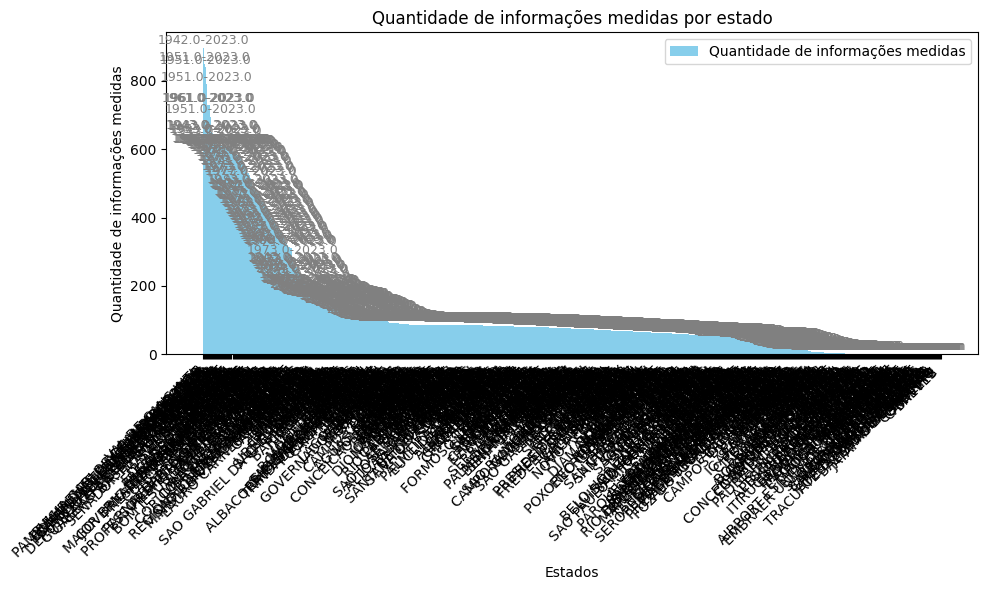

In [ ]:
# Ordenar os estados pelo valor de qtd_rows em ordem decrescente
sorted_states = sorted(dict_describe_state.keys(),
                       key=lambda x: dict_describe_state[x]['qtd_rows'],
                       reverse=True)
qtd_rows = [dict_describe_state[state]['qtd_rows'] for state in sorted_states]
year_min = [dict_describe_state[state]['year_min'] for state in sorted_states]
year_max = [dict_describe_state[state]['year_max'] for state in sorted_states]

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_states, qtd_rows, color='skyblue', label='Quantidade de informações medidas')
plt.xlabel('Estados')
plt.ylabel('Quantidade de informações medidas')
plt.title('Quantidade de informações medidas por estado')
plt.xticks(rotation=45, ha='right')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             f'{year_min[i]}-{year_max[i]}',
             ha='center',
             fontsize=9,
             color='gray')

plt.tight_layout()
plt.legend()
plt.grid(False)

plt.savefig("plot_ghcn_montly_qtd_rows_state.png", dpi=300)

plt.show()

## ANALISANDO VALORES FALTANTES

## VISÃO MÊS

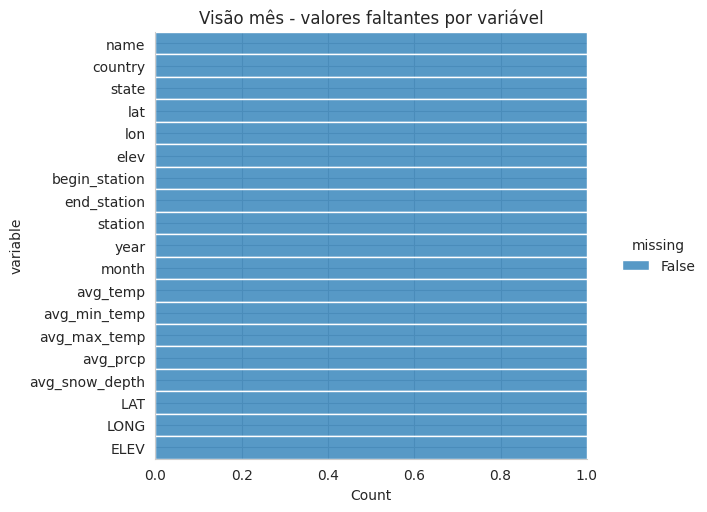

In [ ]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df.eq(999.9).melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Visão mês - valores faltantes por variável')
plt.show()
p.savefig("plot_ghcn_montly_missing_values_i.png")

## VISÃO COLUNA DE TEMPERATURA, INDEPENDENTE DO MÊS

In [ ]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df_one_row_per_month.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Visão independente do mês - valores faltantes por variável')
plt.show()
p.savefig("plot_ghcn_montly_missing_values_ii.png")

NameError: ignored